In [1]:
import pandas as pd
import ast
import json
#from funciones import missing_values_table
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

# Funciones

In [2]:
def missing_values_table(df):
    '''
    Se pasa como parametro un df de pandas, devuelve la 
    cantidad de valores NaN y a que porcentaje del total de valores corresponen
    
    '''
    
    mis_val = df.isna().sum()
    mis_val_percent = 100 * df.isna().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

# 1 Extraccion

In [3]:
lineas = []   #Creamos una lista vacia 

with open('Dataset/australian_user_reviews.json', encoding='utf-8') as f:  #iteramos sobre cada uno de las lineas del DF y rellenamos la lista vacia con cada iteracion
    for line in f.readlines():
        lineas.append(ast.literal_eval(line))
        
user_reviews = pd.DataFrame(lineas)  #creamos el DF con los datos de la lista

In [4]:
user_reviews.head()

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."


1) Vemos el tipo de dato

In [5]:
print('tipo de dato: ',user_reviews['reviews'].dtype)
user_reviews['reviews'].iloc[0]

tipo de dato:  object


[{'funny': '',
  'posted': 'Posted November 5, 2011.',
  'last_edited': '',
  'item_id': '1250',
  'helpful': 'No ratings yet',
  'recommend': True,
  'review': 'Simple yet with great replayability. In my opinion does "zombie" hordes and team work better than left 4 dead plus has a global leveling system. Alot of down to earth "zombie" splattering fun for the whole family. Amazed this sort of FPS is so rare.'},
 {'funny': '',
  'posted': 'Posted July 15, 2011.',
  'last_edited': '',
  'item_id': '22200',
  'helpful': 'No ratings yet',
  'recommend': True,
  'review': "It's unique and worth a playthrough."},
 {'funny': '',
  'posted': 'Posted April 21, 2011.',
  'last_edited': '',
  'item_id': '43110',
  'helpful': 'No ratings yet',
  'recommend': True,
  'review': 'Great atmosphere. The gunplay can be a bit chunky at times but at the end of the day this game is definitely worth it and I hope they do a sequel...so buy the game so I get a sequel!'}]

2) Normalizamos: es objeto por lo tanto no usamos ast

In [6]:
df_exploded=user_reviews.explode('reviews',ignore_index=True)
df_exploded.head()

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'funny': '', 'posted': 'Posted November 5, 20..."
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'funny': '', 'posted': 'Posted July 15, 2011...."
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'funny': '', 'posted': 'Posted April 21, 2011..."
3,js41637,http://steamcommunity.com/id/js41637,"{'funny': '', 'posted': 'Posted June 24, 2014...."
4,js41637,http://steamcommunity.com/id/js41637,"{'funny': '', 'posted': 'Posted September 8, 2..."


In [7]:
reviews_normalized=pd.json_normalize(df_exploded['reviews'])
reviews_normalized.tail()

,funny,posted,last_edited,item_id,helpful,recommend,review
59328,,Posted July 10.,,70,No ratings yet,True,a must have classic from steam definitely wort...
59329,,Posted July 8.,,362890,No ratings yet,True,this game is a perfect remake of the original ...
59330,1 person found this review funny,Posted July 3.,,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...
59331,,Posted July 20.,,730,No ratings yet,True,:D
59332,,Posted July 2.,,440,No ratings yet,True,so much fun :D


In [8]:
df_reviews_final=pd.concat([user_reviews,reviews_normalized],axis=1)
df_reviews_final.drop(columns=['reviews'],inplace=True)

In [9]:
df_reviews_final.head()

,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,js41637,http://steamcommunity.com/id/js41637,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.
2,evcentric,http://steamcommunity.com/id/evcentric,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...
3,doctr,http://steamcommunity.com/id/doctr,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...
4,maplemage,http://steamcommunity.com/id/maplemage,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...


In [10]:
missing_values_table(df_reviews_final)

Your selected dataframe has 9 columns.
There are 9 columns that have missing values.


,Missing Values,% of Total Values
user_id,33534,56.5
user_url,33534,56.5
funny,28,0.0
posted,28,0.0
last_edited,28,0.0
item_id,28,0.0
helpful,28,0.0
recommend,28,0.0
review,28,0.0


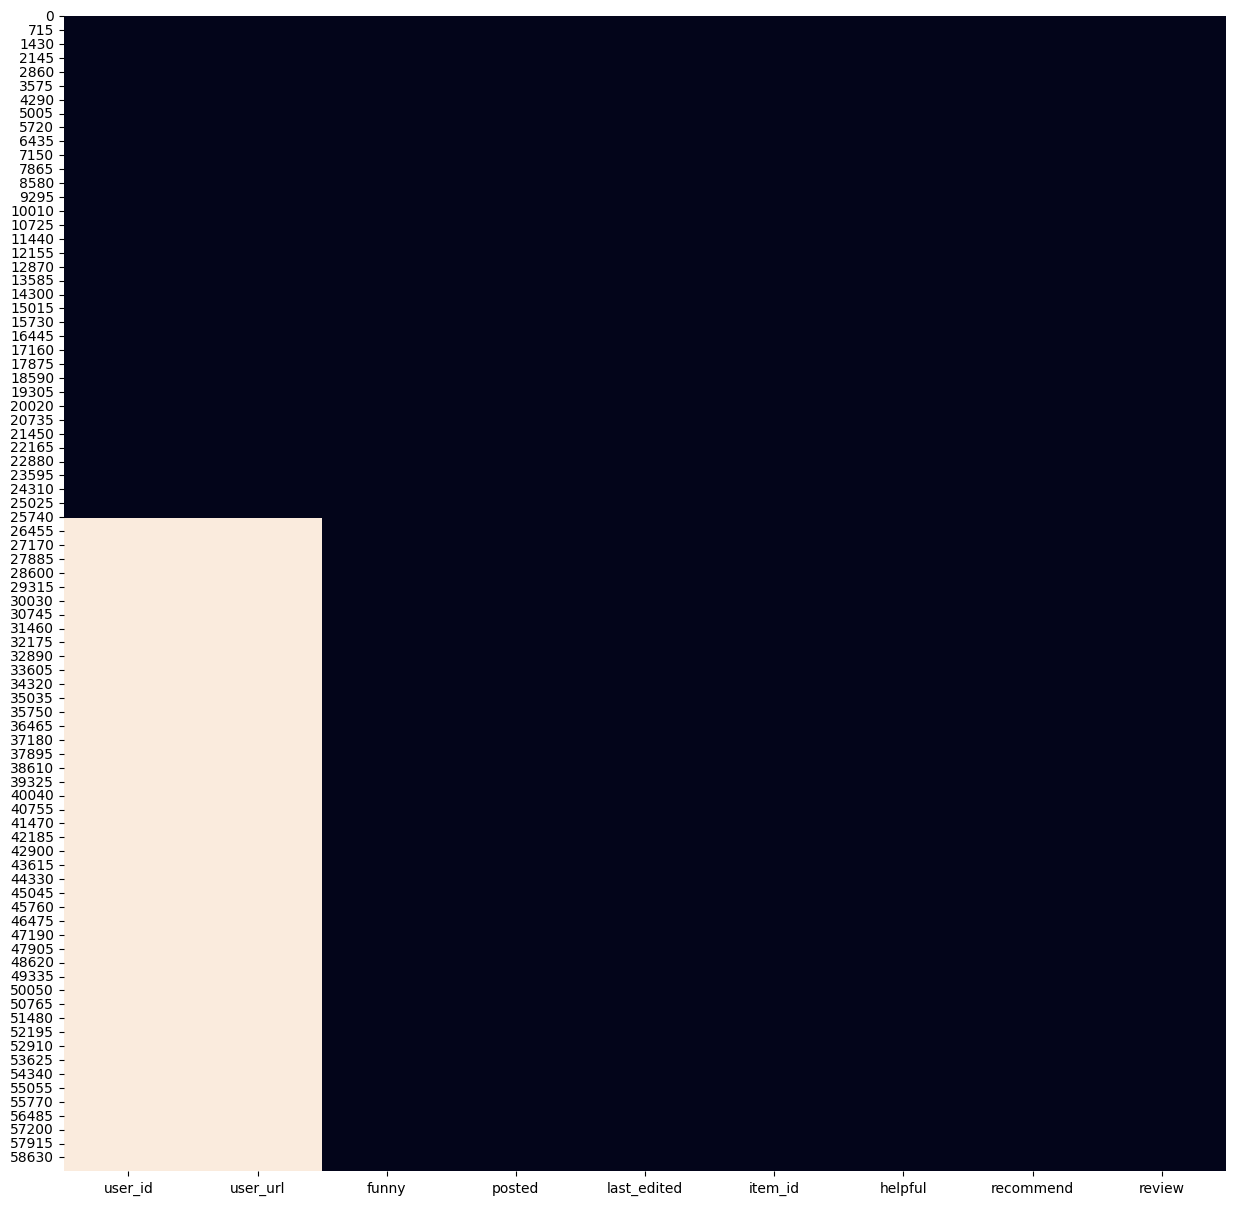

In [11]:
# Reemplazar todos los valores NaN por nan
df_reviews_final = df_reviews_final.fillna(np.nan)
#Observamos graficamente los valores nulos
fig = plt.figure(figsize=(15,15))
sns.heatmap(df_reviews_final.isnull(), cbar=False)
plt.show()

In [12]:
import nltk
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rodrigo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Analisis de sentimiento

In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [14]:
sentimiento=df_reviews_final['review'].apply(lambda x: sia.polarity_scores(x) if isinstance(x,str) else np.nan)

In [18]:
sentimiento

0        {'neg': 0.077, 'neu': 0.681, 'pos': 0.242, 'co...
1        {'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'comp...
2        {'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'comp...
3        {'neg': 0.066, 'neu': 0.721, 'pos': 0.213, 'co...
4        {'neg': 0.041, 'neu': 0.768, 'pos': 0.191, 'co...
                               ...                        
59328    {'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'comp...
59329    {'neg': 0.026, 'neu': 0.692, 'pos': 0.282, 'co...
59330    {'neg': 0.141, 'neu': 0.502, 'pos': 0.357, 'co...
59331    {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...
59332    {'neg': 0.0, 'neu': 0.203, 'pos': 0.797, 'comp...
Name: review, Length: 59333, dtype: object

In [15]:
#definimos como va a ser los parametros, en este nuestro caso 0.15 es el punto que nos va a decir si es positivo, neutral o negativo

def map_sentiment(value):
    if value < -0.15:
        return 0  # Negativo
    elif -0.15 <= value <= 0.15:
        return 1  # Neutral
    else:
        return 2  # Positivo

In [16]:
df_reviews_final['sentimiento'] = sentimiento.apply(lambda x:x['compound'] if isinstance(x,dict) else np.nan)

In [17]:
df_reviews_final.head()

,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review,sentimiento
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,0.8481
1,js41637,http://steamcommunity.com/id/js41637,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.,0.2263
2,evcentric,http://steamcommunity.com/id/evcentric,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,0.9117
3,doctr,http://steamcommunity.com/id/doctr,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,0.9566
4,maplemage,http://steamcommunity.com/id/maplemage,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,0.9708


In [19]:
df_reviews_final['sentiment_analysis'] = df_reviews_final['sentimiento'].apply(map_sentiment)

Eliminar columnas no usadas

In [20]:
df_reviews_final.drop(columns=['sentimiento','review'], inplace = True)

<Axes: >

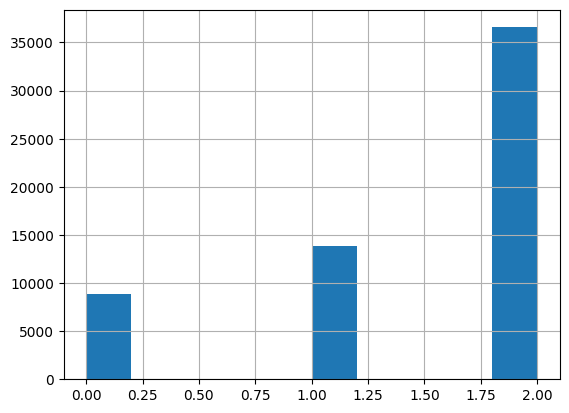

In [21]:
df_reviews_final['sentiment_analysis'].hist()

# Guardar datos

In [22]:
df_reviews_final.to_csv('reviews.csv', index=False)

# 2 Transformacion

# 3 Carga

In [1]:
import pandas as pd
import joblib
similarity = joblib.load('modelo_entrenado.pkl')


df1 = pd.read_csv(r"consulta1.csv")

In [2]:
def obtener_recomendaciones(user_id, cosine_sim=similarity):
    idx = df1[df1['user_id'] == user_id].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:4]  # Obtener las 3 recomendaciones principales
    ap_indices = [i[0] for i in sim_scores]
    lista_top= df1['app_name'].iloc[ap_indices]

    respuesta = {user_id:[
        {'Top 3 Lista recomendado': lista_top}]
        }

    return respuesta

In [3]:
print(obtener_recomendaciones('evcentric'))

{'evcentric': [{'Top 3 Lista recomendado': 1    Team Fortress Classic
2            Day of Defeat
3       Deathmatch Classic
Name: app_name, dtype: object}]}
